In [118]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns

In [119]:
df = sns.load_dataset("tips")
n_df = df[["total_bill", "tip"]]
n_df

,total_bill,tip
0,16.99,1.01
1,10.34,1.66
2,21.01,3.50
3,23.68,3.31
4,24.59,3.61
...,...,...
239,29.03,5.92
240,27.18,2.00
241,22.67,2.00
242,17.82,1.75


In [120]:
X = n_df["total_bill"]
y = n_df["tip"]

In [121]:
X = X.values

In [122]:
X = X.reshape(-1, 1)

In [123]:
from sklearn.preprocessing import MinMaxScaler
s = MinMaxScaler().fit(X)
s_X = s.transform(X)
s_X

array([[0.29157939],
       [0.1522832 ],
       [0.3757855 ],
       [0.43171345],
       [0.45077503],
       [0.46543779],
       [0.11939673],
       [0.49874319],
       [0.25073314],
       [0.24528697],
       [0.15081693],
       [0.67427734],
       [0.25869292],
       [0.32174277],
       [0.24633431],
       [0.38772518],
       [0.15207373],
       [0.27691663],
       [0.29116045],
       [0.36824466],
       [0.31105991],
       [0.36070381],
       [0.2660243 ],
       [0.761416  ],
       [0.35085882],
       [0.30875576],
       [0.21575199],
       [0.20150817],
       [0.39023879],
       [0.34729786],
       [0.13573523],
       [0.32006703],
       [0.25115207],
       [0.36908253],
       [0.30812736],
       [0.43967323],
       [0.27733557],
       [0.29032258],
       [0.32718894],
       [0.59069962],
       [0.27167993],
       [0.30142438],
       [0.22769166],
       [0.13845832],
       [0.57247591],
       [0.31881022],
       [0.40134059],
       [0.614

In [124]:
from sklearn.model_selection import train_test_split
#len(train_test_split(X, y))
tr_x, tt_x, tr_y, tt_y = train_test_split(X, y)
tr_x.shape, tt_x.shape, tr_y.shape, tt_y.shape

((183, 1), (61, 1), (183,), (61,))

2번째 방법

In [125]:
X = n_df["total_bill"]
y = n_df["tip"]
tr_x, tt_x, tr_y, tt_y = train_test_split(X, y, random_state = 1)
tr_x.shape, tt_x.shape, tr_y.shape, tt_y.shape

((183,), (61,), (183,), (61,))

In [126]:
tr_x = tr_x.values.reshape(-1, 1)
tt_x = tt_x.values.reshape(-1, 1)

In [127]:
tr_x.shape, tt_x.shape, tr_y.shape, tt_y.shape

((183, 1), (61, 1), (183,), (61,))

In [128]:
tr_s = MinMaxScaler().fit(X.values.reshape(-1, 1))
s_tr_x = tr_s.transform(tr_x)
s_tt_x = tr_s.transform(tt_x)
# tr_y = MinMaxScaler().fit(y.values.reshape(-1, 1))
# s_tr_y = tr_y.transform(tr_y)
# s_tt_y = tr_y.transform(tt_y)

In [129]:
from sklearn.linear_model import LinearRegression
m = LinearRegression()
m.fit(s_tr_x, tr_y)

LinearRegression()

In [130]:
m.score(s_tr_x, tr_y)

0.44603280564588943

In [131]:
from sklearn.neighbors import KNeighborsRegressor
m1 = KNeighborsRegressor()
m1.fit(s_tr_x, tr_y)
m1.score(s_tr_x, tr_y), m1.score(s_tt_x, tt_y)

(0.5276932609142606, 0.3802073893426069)

In [132]:
from sklearn.tree import DecisionTreeRegressor
m2 = DecisionTreeRegressor()
m2.fit(s_tr_x, tr_y)
m2.score(s_tr_x, tr_y), m2.score(s_tt_x, tt_y)

(0.9579019740435393, 0.25555600677976265)

In [133]:
df = pd.read_csv("data2.csv")
df
X = df[['length', ' height']]
y = df[' width']

In [134]:
X.shape, y.shape

((56, 2), (56,))

In [135]:
tr_x, tt_x, tr_y, tt_y = train_test_split(X, y, random_state = 1)

In [136]:
from sklearn.preprocessing import MinMaxScaler
m_s = MinMaxScaler()
m_s.fit(X)
s_tr_x = m_s.transform(tr_x)
s_tt_x = m_s.transform(tt_x)

s_tr_x.shape, tr_y.shape, s_tt_x.shape, tt_y.shape

((42, 2), (42,), (14, 2), (14,))

학습

In [137]:
tr_x_1 = s_tr_x[:, :1]
tr_x_2 = s_tr_x
tt_x_1 = s_tt_x[:, :1]
tt_x_2 = s_tt_x

In [138]:
tr_x_1.shape, tr_x_2.shape, tt_x_1.shape, tt_x_2.shape

((42, 1), (42, 2), (14, 1), (14, 2))

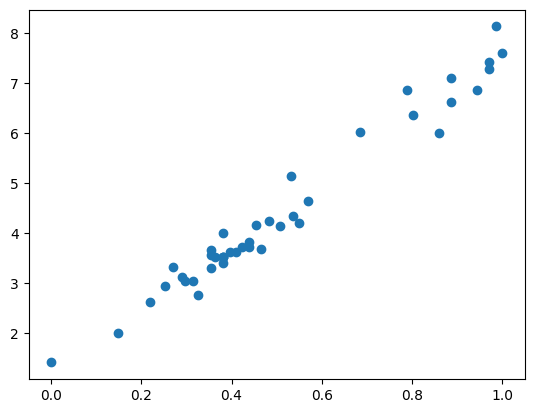

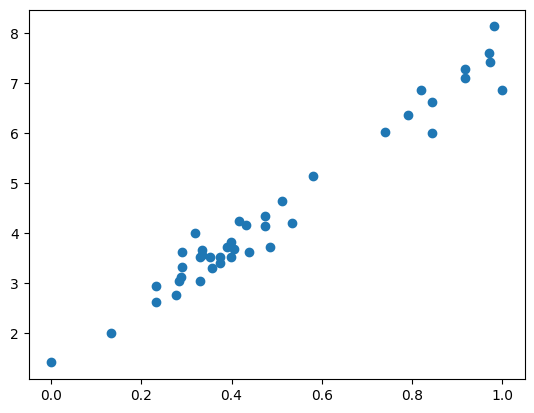

In [139]:
plt.scatter(tr_x_2[:, 0], tr_y.values)
plt.show()
plt.scatter(tr_x_2[:, 1], tr_y.values)
plt.show()

In [140]:
m = LinearRegression()
m.fit(tr_x_1, tr_y.values)

LinearRegression()

In [141]:
m.score(tr_x_1, tr_y.values), m.score(tt_x_1, tt_y.values)

(0.9674832553034299, 0.8550117686605199)

In [142]:
m2 = LinearRegression()
m2.fit(tr_x_2, tr_y.values)

LinearRegression()

In [143]:
m2.score(tr_x_2, tr_y.values), m2.score(tt_x_2, tt_y.values)

(0.9719231546873426, 0.9099929008210612)

In [144]:
m2.coef_, m2.intercept_ # W, b
# y = Wx + b
#y = W[0] * s_tr_x[:, 0] + W[1] * s_tr_x[:, 1] + b

(array([3.54374658, 2.8598337 ]), 1.1896947559377988)

In [145]:
def h(X):
    W = [3.54374658, 2.8598337]
    b = 1.1896947559377988
    return W[0] * W[0] + W[1] + X[1] + b

In [146]:
in_x = tt_x_2[0]

In [147]:
py = h(in_x)
py

17.45238296582251

In [148]:
ty = tt_y.values[0]
ty

7.49

In [149]:
s_tr_y = tr_y.values
s_tt_y = tt_y.values

In [150]:
tr_x_1.shape, s_tr_y.shape, tt_x_1.shape, s_tt_y.shape

((42, 1), (42,), (14, 1), (14,))

In [151]:
m1 = LinearRegression()
m1.fit(tr_x_1, s_tr_y)

LinearRegression()

In [152]:
m1.coef_, m1.intercept_

(array([6.43647782]), 1.1342677806774741)

In [153]:
len(m1.coef_)

1

In [157]:
ck_X = np.arange(0, 100)
ck_y = 6.43647782 * ck_X + 1.1342677806774741

In [158]:
ck_X.shape, ck_y.shape

((100,), (100,))

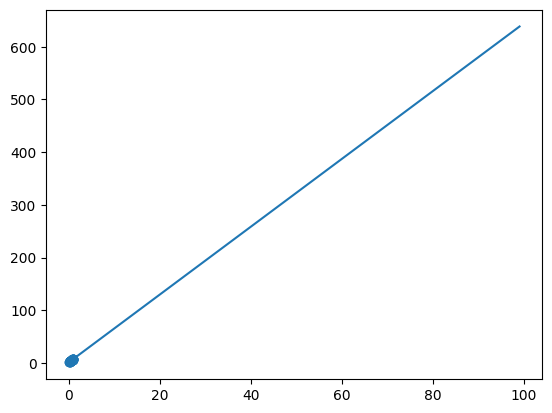

In [160]:
plt.scatter(tr_x_1, s_tr_y)
plt.plot(ck_X, ck_y)

In [152]:
def h(W, b, X):
    z = 0
    for i in range(len(W)):
        z = W[i] * X[i]
    z += b
    return z

In [156]:
def h(W, b, X):
    return W.T@X + b

In [161]:
m2 = LinearRegression()
m2.fit(tr_x_2, s_tr_y)

LinearRegression()

In [162]:
m2.coef_, m2.intercept_

(array([3.54374658, 2.8598337 ]), 1.1896947559377988)

In [163]:
py = 3.54374658*tt_x_2[:, 0] + 2.8598337 * tt_x_2[:, 1] + 1.1896947559377988
py

array([6.65146765, 2.30414786, 6.99657387, 3.59647306, 4.41254407,
       4.47407464, 4.81389147, 6.34692734, 7.0827411 , 6.3721235 ,
       6.90885037, 3.64045892, 5.96810086, 6.21104949])

In [164]:
m2.predict(tt_x_2)

array([6.65146764, 2.30414786, 6.99657386, 3.59647305, 4.41254407,
       4.47407463, 4.81389147, 6.34692734, 7.08274109, 6.37212349,
       6.90885036, 3.64045892, 5.96810085, 6.21104949])

In [167]:
abs(s_tt_y - py).sum() / len(s_tt_y - py)

0.34061512415706796

In [168]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(s_tt_y, py)

0.34061512415706796

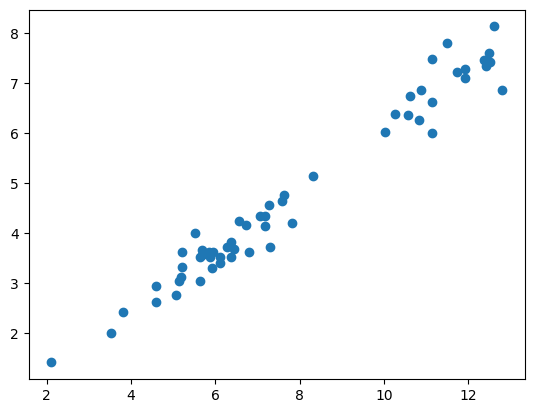

In [169]:
x1 = df[' height']
x2 = df[' width']
x3 = df
plt.scatter(x1, x2)


Q1 tip의 선형회귀분석 진행(머신러닝)
1. 데이터 수집
2. 데이터 분석 및 준비

- 카테고리 데이터는 원핫 인코딩 방식과 라벨 인코딩 방식

3. 학습
4. 테스트 및 검증

In [170]:
df = sns.load_dataset('tips')
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [171]:
y = df['tip']
X = df.drop(['tip'], axis = 1)
X, y

(     total_bill     sex smoker   day    time  size
 0         16.99  Female     No   Sun  Dinner     2
 1         10.34    Male     No   Sun  Dinner     3
 2         21.01    Male     No   Sun  Dinner     3
 3         23.68    Male     No   Sun  Dinner     2
 4         24.59  Female     No   Sun  Dinner     4
 ..          ...     ...    ...   ...     ...   ...
 239       29.03    Male     No   Sat  Dinner     3
 240       27.18  Female    Yes   Sat  Dinner     2
 241       22.67    Male    Yes   Sat  Dinner     2
 242       17.82    Male     No   Sat  Dinner     2
 243       18.78  Female     No  Thur  Dinner     2
 
 [244 rows x 6 columns],
 0      1.01
 1      1.66
 2      3.50
 3      3.31
 4      3.61
        ... 
 239    5.92
 240    2.00
 241    2.00
 242    1.75
 243    3.00
 Name: tip, Length: 244, dtype: float64)

In [174]:
X.isnull().sum(), y.isnull().sum()

(total_bill    0
 sex           0
 smoker        0
 day           0
 time          0
 size          0
 dtype: int64,
 0)

In [175]:
X.info(), y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   sex         244 non-null    category
 2   smoker      244 non-null    category
 3   day         244 non-null    category
 4   time        244 non-null    category
 5   size        244 non-null    int64   
dtypes: category(4), float64(1), int64(1)
memory usage: 5.5 KB
<class 'pandas.core.series.Series'>
RangeIndex: 244 entries, 0 to 243
Series name: tip
Non-Null Count  Dtype  
--------------  -----  
244 non-null    float64
dtypes: float64(1)
memory usage: 2.0 KB


(None, None)